In [ ]:
import scipy
import xgboost
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import Symbol, nsolve, solve
#from sympy.solvers import solve

import time
import pickle
import keras# check scikit-learn version

# check scikit-learn version
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from skimage.metrics import structural_similarity as ssim

In [ ]:
from tensorflow import keras
#from tensorflow.python.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D,Cropping2D, AveragePooling2D,Dense,Flatten,Reshape,Dropout,TimeDistributed,LSTM,LeakyReLU,RepeatVector

from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D,Cropping2D,TimeDistributed, AveragePooling2D,Dense,Flatten,Reshape,Dropout,LSTM,LeakyReLU,RepeatVector,Conv2DTranspose
from tensorflow.keras.models import Model,Sequential


import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
#import seaborn_image as isns
import numpy as np
#from matplotlib import cm
#from matplotlib import animation as animation
from PIL import Image

import tensorflow as tf
from tensorflow import keras
#import keras
import time

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
field_data_u = np.load('drive/MyDrive/SW_contrastive/data/frame_data_200_u.npy')
field_data_v = np.load('drive/MyDrive/SW_contrastive/data/frame_data_200_v.npy')
field_data_h = np.load('drive/MyDrive/SW_contrastive/data/frame_data_200_h.npy')

field_data = np.zeros((20000,64,64,3))

field_data[:,:,:,0] = field_data_u
field_data[:,:,:,1] = field_data_v
field_data[:,:,:,2] = field_data_h

del field_data_u,field_data_v,field_data_h

In [ ]:
field_data_u_true = np.load('drive/MyDrive/SW_contrastive/data/frame_data_200_u.npy')
field_data_v_true = np.load('drive/MyDrive/SW_contrastive/data/frame_data_200_v.npy')
field_data_h_true = np.load('drive/MyDrive/SW_contrastive/data/frame_data_200_h.npy')

field_data_true = np.zeros((20000,64,64,3))

field_data_true[:,:,:,0] = field_data_u_true
field_data_true[:,:,:,1] = field_data_v_true
field_data_true[:,:,:,2] = field_data_h_true

del field_data_u_true,field_data_v_true,field_data_h_true

In [ ]:
print(field_data.shape)

(20000, 64, 64, 3)


In [ ]:
method = 'CAE'

parameter_input = np.load('drive/MyDrive/SW_contrastive/data/parameter_data_uvh_200.npy')[:20000,:]
#latent_output = np.load('drive/MyDrive/SW_contrastive/data/latent_code_64_'+method+'_200_uvh_noisy.npy')
latent_output = np.load('drive/MyDrive/SW_contrastive/data/latent_code_64_'+method+'_200_uvh.npy')


# Forward prediction

# inverse modelling

In [ ]:
input_data_train = latent_output[:15000,:]
input_data_test = latent_output[15000:,:]
train_input = input_data_train
test_input = input_data_test

true_train_output = parameter_input[:15000,:]
true_test_output = parameter_input[15000:,:]

In [ ]:
GB_model = XGBRegressor()

GB_model.fit(train_input, true_train_output)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
test_output = GB_model.predict(test_input)

# CAE

R2 SCORE 0.9469135693158984


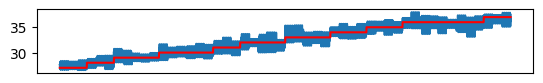

R2 SCORE 0.9449382734170924


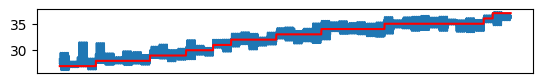

R2 SCORE 0.5694551369784482


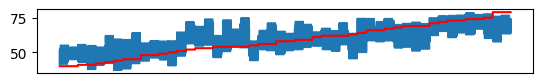

R2 SCORE 0.6054040187265572


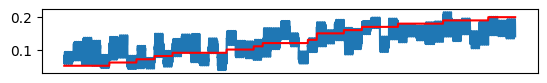

R2 SCORE 0.3360915763190788


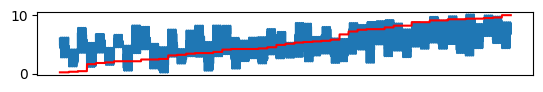

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score
#plt.figure(figsize=(14,6))
for index in range(5):
  plt.subplot(5, 1, index+1)
  s = list(true_test_output[:,index])

  deg1 = true_test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  deg2 = test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  print('R2 SCORE',r2_score(deg1,deg2))

  plt.plot(deg2,label = "model")
  plt.plot(deg1,'r',label = "true")
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
  #plt.legend()
  plt.show()


# Contrastive

R2 SCORE 0.9837734556091736


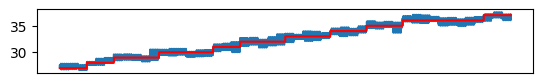

R2 SCORE 0.9787413944314033


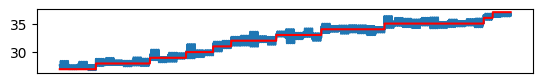

R2 SCORE 0.6942728040560944


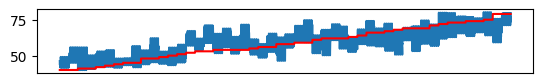

R2 SCORE 0.7090116625259839


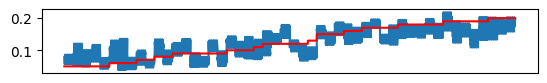

R2 SCORE 0.4786738249320508


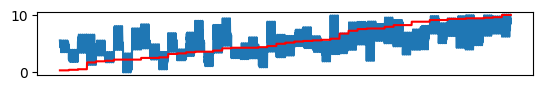

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score
#plt.figure(figsize=(14,6))
for index in range(5):
  plt.subplot(5, 1, index+1)
  s = list(true_test_output[:,index])

  deg1 = true_test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  deg2 = test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  print('R2 SCORE',r2_score(deg1,deg2))

  plt.plot(deg2,label = "model")
  plt.plot(deg1,'r',label = "true")
  #plt.legend()
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
  plt.show()

# latent space geometry

In [ ]:
method = 'CAE'


latent_output = np.load('drive/MyDrive/SW_contrastive/data/latent_code_64_'+method+'_200_uvh.npy')

label_data = []

for i in range(50):
  label_data += [i]*(400)

label_data = np.array(label_data).astype(np.uint8)

<ipython-input-35-f0d5088407e3>:20: UserWarning: 
The palette list has fewer values (25) than needed (50) and will cycle, which may produce an uninterpretable plot.
  g = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


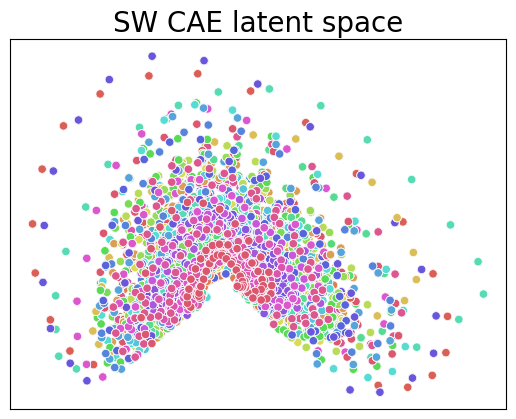

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#iris = load_iris()
x = latent_output
y = label_data

tsne = PCA(n_components=2)  # Use PCA instead of t-SNE

z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

g = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 25),
                    data=df)

g.get_legend().remove()

# Remove x and y ticks and labels
g.set_xticks([])
g.set_yticks([])
g.set_xticklabels([])
g.set_yticklabels([])

# Set the title font size
g.set_title("SW CAE latent space", fontsize=20)

# Remove 'comp-1' and 'comp-2' labels
g.set_xlabel('')
g.set_ylabel('')

# Save the plot as a PNG image
plt.savefig("drive/MyDrive/contrastive/image/SW_CAE_latent.png")

# Show the plot (optional)
plt.show()


In [ ]:
method = 'contrastive'


latent_output = np.load('drive/MyDrive/SW_contrastive/data/latent_code_64_'+method+'_200.npy')

label_data = []

for i in range(50):
  label_data += [i]*(400)

label_data = np.array(label_data).astype(np.uint8)

<ipython-input-37-6bb4f60b54d9>:20: UserWarning: 
The palette list has fewer values (25) than needed (50) and will cycle, which may produce an uninterpretable plot.
  g = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


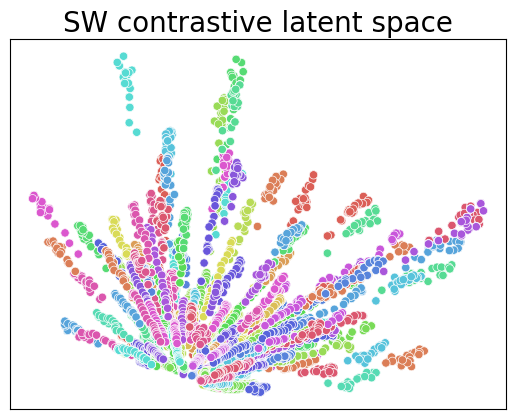

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#iris = load_iris()
x = latent_output
y = label_data

tsne = PCA(n_components=2)  # Use PCA instead of t-SNE

z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

g = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 25),
                    data=df)
g.set_title("SW contrastive latent space", fontsize=20)
g.get_legend().remove()

# Remove x and y ticks and labels
g.set_xticks([])
g.set_yticks([])
g.set_xticklabels([])
g.set_yticklabels([])

# Remove 'comp-1' and 'comp-2' labels
g.set_xlabel('')
g.set_ylabel('')

# Save the plot as a PNG image
plt.savefig("drive/MyDrive/contrastive/image/SW_contrastive_latent.png")

# Show the plot (optional)
plt.show()
